In [1]:
import os
import sys

sys.path.append(os.path.join(os.getcwd(), ".."))

In [2]:
from torch import nn
from torch.utils.data import DataLoader
import torch
import torch.optim as optim
from notebooks.helpers import PreprocessingDataframe,EmbeddingModel,MELDDataset,CrossAttentionTextEnrichmentModel


/Users/marcofura/anaconda3/envs/deep_learning_avanzado/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import pandas as pd

# Load the CSV file into a DataFrame
pathname = '../datasets/MELD.Raw/dev_sent_emo.csv'
pathname_train = '../datasets/MELD.Raw/train/train_sent_emo.csv'
df = pd.read_csv(pathname)

In [4]:
embedding_model = EmbeddingModel(model_name='hubert')

In [5]:
preprocessing = PreprocessingDataframe(df,folder_audio_path='../datasets/MELD.Raw/dev_splits_complete')

In [6]:
# solo cuando ya están generados los wav_files
preprocessing.set_path_wavfiles()

In [7]:
preprocessing.generate_wavfiles_from_df()

La columna 'wav_file' existe en el DataFrame.
Skipping row 0 <class 'str'>
Skipping row 1 <class 'str'>
Skipping row 2 <class 'str'>
Skipping row 3 <class 'str'>
Skipping row 4 <class 'str'>
Skipping row 5 <class 'str'>
Skipping row 6 <class 'str'>
Skipping row 7 <class 'str'>
Skipping row 8 <class 'str'>
Skipping row 9 <class 'str'>
Skipping row 10 <class 'str'>
Skipping row 11 <class 'str'>
Skipping row 12 <class 'str'>
Skipping row 13 <class 'str'>
Skipping row 14 <class 'str'>
Skipping row 15 <class 'str'>
Skipping row 16 <class 'str'>
Skipping row 17 <class 'str'>
Skipping row 18 <class 'str'>
Skipping row 19 <class 'str'>
Skipping row 20 <class 'str'>
Skipping row 21 <class 'str'>
Skipping row 22 <class 'str'>
Skipping row 23 <class 'str'>
Skipping row 24 <class 'str'>
Skipping row 25 <class 'str'>
Skipping row 26 <class 'str'>
Skipping row 27 <class 'str'>
Skipping row 28 <class 'str'>
Skipping row 29 <class 'str'>
Skipping row 30 <class 'str'>
Skipping row 31 <class 'str'>
Skip

In [8]:
preprocessing.drop_na()

In [9]:
row_data = preprocessing.df.iloc[0]

In [10]:
embedding_audio=embedding_model.embed_audio(row_data['wav_file'])

Sample rate: 48000
Waveform shape before: torch.Size([6, 134144])
Bundle sample rate: 16000
Waveform shape: torch.Size([1, 44715])


In [11]:
embedding_text=embedding_model.embed_text(row_data['Utterance'])

Input type: <class 'transformers.tokenization_utils_base.BatchEncoding'>
Inputs Shape: torch.Size([1, 17])


In [12]:
embedding_audio.shape

torch.Size([1, 139, 768])

In [13]:
preprocessing.add_embeddings(embedding_model)

Generating audio embeddings for  ../datasets/MELD.Raw/dev_splits_complete/dia0_utt0.wav
Sample rate: 48000
Waveform shape before: torch.Size([6, 134144])
Bundle sample rate: 16000
Waveform shape: torch.Size([1, 44715])
before saving in DF <class 'torch.Tensor'>
Generating text embeddings for  Oh my God, hes lost it. Hes totally lost it.
Input type: <class 'transformers.tokenization_utils_base.BatchEncoding'>
Inputs Shape: torch.Size([1, 17])
before saving in DF  <class 'torch.Tensor'>
Generating audio embeddings for  ../datasets/MELD.Raw/dev_splits_complete/dia0_utt1.wav
Sample rate: 48000
Waveform shape before: torch.Size([6, 64512])
Bundle sample rate: 16000
Waveform shape: torch.Size([1, 21504])
before saving in DF <class 'torch.Tensor'>
Generating text embeddings for  What?
Input type: <class 'transformers.tokenization_utils_base.BatchEncoding'>
Inputs Shape: torch.Size([1, 4])
before saving in DF  <class 'torch.Tensor'>
Generating audio embeddings for  ../datasets/MELD.Raw/dev_s

In [14]:
preprocessing.df.head()

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,wav_file,audio_embeddings,text_embeddings
0,1.0,"Oh my God, hes lost it. Hes totally lost it.",Phoebe,sadness,negative,0.0,0.0,4.0,7.0,"00:20:57,256","00:21:00,049",../datasets/MELD.Raw/dev_splits_complete/dia0_...,"[[[tensor(-0.0102), tensor(-0.1646), tensor(0....","[[[tensor(-0.4690), tensor(-0.0323), tensor(-0..."
1,2.0,What?,Monica,surprise,negative,0.0,1.0,4.0,7.0,"00:21:01,927","00:21:03,261",../datasets/MELD.Raw/dev_splits_complete/dia0_...,"[[[tensor(-0.0502), tensor(0.1232), tensor(0.2...","[[[tensor(-0.0302), tensor(0.2743), tensor(-0...."
2,3.0,"Or! Or, we could go to the bank, close our acc...",Ross,neutral,neutral,1.0,0.0,4.0,4.0,"00:12:24,660","00:12:30,915",../datasets/MELD.Raw/dev_splits_complete/dia1_...,"[[[tensor(-0.1483), tensor(-0.0067), tensor(0....","[[[tensor(0.0823), tensor(0.0437), tensor(-0.0..."
3,4.0,Youre a genius!,Chandler,joy,positive,1.0,1.0,4.0,4.0,"00:12:32,334","00:12:33,960",../datasets/MELD.Raw/dev_splits_complete/dia1_...,"[[[tensor(0.2420), tensor(0.2939), tensor(0.11...","[[[tensor(0.0492), tensor(0.4535), tensor(-0.3..."
4,5.0,"Aww, man, now we wont be bank buddies!",Joey,sadness,negative,1.0,2.0,4.0,4.0,"00:12:34,211","00:12:37,505",../datasets/MELD.Raw/dev_splits_complete/dia1_...,"[[[tensor(0.0073), tensor(-0.4655), tensor(-0....","[[[tensor(0.2168), tensor(0.5973), tensor(-0.2..."


In [15]:
preprocessing.drop_na()

In [16]:
preprocessing.add_label_encoder_to_emotion()

In [17]:
preprocessing.df.head()

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,wav_file,audio_embeddings,text_embeddings,emotion
0,1.0,"Oh my God, hes lost it. Hes totally lost it.",Phoebe,sadness,negative,0.0,0.0,4.0,7.0,"00:20:57,256","00:21:00,049",../datasets/MELD.Raw/dev_splits_complete/dia0_...,"[[[tensor(-0.0102), tensor(-0.1646), tensor(0....","[[[tensor(-0.4690), tensor(-0.0323), tensor(-0...",5
1,2.0,What?,Monica,surprise,negative,0.0,1.0,4.0,7.0,"00:21:01,927","00:21:03,261",../datasets/MELD.Raw/dev_splits_complete/dia0_...,"[[[tensor(-0.0502), tensor(0.1232), tensor(0.2...","[[[tensor(-0.0302), tensor(0.2743), tensor(-0....",6
2,3.0,"Or! Or, we could go to the bank, close our acc...",Ross,neutral,neutral,1.0,0.0,4.0,4.0,"00:12:24,660","00:12:30,915",../datasets/MELD.Raw/dev_splits_complete/dia1_...,"[[[tensor(-0.1483), tensor(-0.0067), tensor(0....","[[[tensor(0.0823), tensor(0.0437), tensor(-0.0...",4
3,4.0,Youre a genius!,Chandler,joy,positive,1.0,1.0,4.0,4.0,"00:12:32,334","00:12:33,960",../datasets/MELD.Raw/dev_splits_complete/dia1_...,"[[[tensor(0.2420), tensor(0.2939), tensor(0.11...","[[[tensor(0.0492), tensor(0.4535), tensor(-0.3...",3
4,5.0,"Aww, man, now we wont be bank buddies!",Joey,sadness,negative,1.0,2.0,4.0,4.0,"00:12:34,211","00:12:37,505",../datasets/MELD.Raw/dev_splits_complete/dia1_...,"[[[tensor(0.0073), tensor(-0.4655), tensor(-0....","[[[tensor(0.2168), tensor(0.5973), tensor(-0.2...",5


In [18]:
row_data['Utterance']

'Oh my God, he\x92s lost it. He\x92s totally lost it.'

In [19]:
preprocessing.save_embeddings('df_train_embeddings_hubert.pkl')

In [6]:
preprocessing.load_embeddings('df_train_embeddings_hubert.pkl')

In [7]:
preprocessing.df.head()

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,wav_file,audio_embeddings,text_embeddings,emotion
0,1.0,"Oh my God, hes lost it. Hes totally lost it.",Phoebe,sadness,negative,0.0,0.0,4.0,7.0,"00:20:57,256","00:21:00,049",../datasets/MELD.Raw/dev_splits_complete/dia0_...,"[[[tensor(-0.0102), tensor(-0.1646), tensor(0....","[[[tensor(-0.4690), tensor(-0.0323), tensor(-0...",5
1,2.0,What?,Monica,surprise,negative,0.0,1.0,4.0,7.0,"00:21:01,927","00:21:03,261",../datasets/MELD.Raw/dev_splits_complete/dia0_...,"[[[tensor(-0.0502), tensor(0.1232), tensor(0.2...","[[[tensor(-0.0302), tensor(0.2743), tensor(-0....",6
2,3.0,"Or! Or, we could go to the bank, close our acc...",Ross,neutral,neutral,1.0,0.0,4.0,4.0,"00:12:24,660","00:12:30,915",../datasets/MELD.Raw/dev_splits_complete/dia1_...,"[[[tensor(-0.1483), tensor(-0.0067), tensor(0....","[[[tensor(0.0823), tensor(0.0437), tensor(-0.0...",4
3,4.0,Youre a genius!,Chandler,joy,positive,1.0,1.0,4.0,4.0,"00:12:32,334","00:12:33,960",../datasets/MELD.Raw/dev_splits_complete/dia1_...,"[[[tensor(0.2420), tensor(0.2939), tensor(0.11...","[[[tensor(0.0492), tensor(0.4535), tensor(-0.3...",3
4,5.0,"Aww, man, now we wont be bank buddies!",Joey,sadness,negative,1.0,2.0,4.0,4.0,"00:12:34,211","00:12:37,505",../datasets/MELD.Raw/dev_splits_complete/dia1_...,"[[[tensor(0.0073), tensor(-0.4655), tensor(-0....","[[[tensor(0.2168), tensor(0.5973), tensor(-0.2...",5


In [7]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(preprocessing.df, test_size=0.2, random_state=42)


In [8]:
meld_dataset = MELDDataset(train_df[['audio_embeddings','text_embeddings','emotion']])
meld_dataset_val = MELDDataset(val_df[['audio_embeddings','text_embeddings','emotion']])


In [9]:
for i in range(2):
    row_data = meld_dataset[i]
    print(row_data[0].shape)
    print(row_data[1].shape)
    print(row_data[2])

torch.Size([1, 7, 768])
torch.Size([1, 56, 768])
tensor(4)
torch.Size([1, 5, 768])
torch.Size([1, 65, 768])
tensor(4)


/Users/marcofura/Desktop/maestria/DeepLearningAvanzado/proyecto-final/notebooks/../notebooks/helpers/data_loader.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  text_embedding = torch.tensor(self.dataframe.iloc[idx]["text_embeddings"], dtype=torch.float32)
/Users/marcofura/Desktop/maestria/DeepLearningAvanzado/proyecto-final/notebooks/../notebooks/helpers/data_loader.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  audio_embedding = torch.tensor(self.dataframe.iloc[idx]["audio_embeddings"], dtype=torch.float32)


In [10]:
from torch.nn.utils.rnn import pad_sequence

In [11]:
def collate_fn_with_padding(batch):
    """
    Función de collate para manejar datos de texto y audio con diferentes longitudes.
    """
    text_embeddings, audio_embeddings, labels = zip(*batch)
    
    # Eliminar dimensiones innecesarias (e.g., de [1, seq_len, 768] a [seq_len, 768])
    text_embeddings = [t.squeeze(0) for t in text_embeddings]
    audio_embeddings = [a.squeeze(0) for a in audio_embeddings]

    # Padding para texto
    text_padded = pad_sequence(text_embeddings, batch_first=True)  # (batch_size, max_text_len, 768)
    text_mask = (text_padded.sum(dim=-1) != 0).float()  # Máscara de texto (1 donde hay datos reales, 0 en padding)

    # Padding para audio
    audio_padded = pad_sequence(audio_embeddings, batch_first=True)  # (batch_size, max_audio_len, 768)
    audio_mask = (audio_padded.sum(dim=-1) != 0).float()  # Máscara de audio

    # Convertir etiquetas a tensor
    labels = torch.tensor(labels)

    return text_padded, audio_padded, labels, text_mask, audio_mask

In [10]:
train_loader = DataLoader(meld_dataset, batch_size=16, shuffle=True,collate_fn=collate_fn_with_padding)


NameError: name 'collate_fn_with_padding' is not defined

In [13]:
val_loader = DataLoader(meld_dataset_val, batch_size=16, shuffle=True,collate_fn=collate_fn_with_padding)


In [14]:
for batch in train_loader:
    print('Batch')
    text_embeddings, audio_embeddings, labels,text_mask,audio_mask = batch
    print(text_embeddings.shape)
    print(audio_embeddings.shape)
    print(labels)
    print(text_mask)
    print(audio_mask)
    break
    

Batch
torch.Size([16, 25, 768])
torch.Size([16, 319, 768])
tensor([5, 6, 0, 0, 6, 6, 4, 4, 2, 4, 4, 3, 4, 3, 5, 3])
tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.

/Users/marcofura/Desktop/maestria/DeepLearningAvanzado/proyecto-final/notebooks/../notebooks/helpers/data_loader.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  text_embedding = torch.tensor(self.dataframe.iloc[idx]["text_embeddings"], dtype=torch.float32)
/Users/marcofura/Desktop/maestria/DeepLearningAvanzado/proyecto-final/notebooks/../notebooks/helpers/data_loader.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  audio_embedding = torch.tensor(self.dataframe.iloc[idx]["audio_embeddings"], dtype=torch.float32)


In [ ]:
def monitor_gradients(model):
    max_grad = 0
    min_grad = float('inf')
    for name, param in model.named_parameters():
        if param.grad is not None:
            grad_norm = param.grad.norm().item()
            max_grad = max(max_grad, grad_norm)
            min_grad = min(min_grad, grad_norm)
            # print(f"Layer: {name}, Grad Norm: {grad_norm:.6f}")
    # print(f"Max Grad Norm: {max_grad:.6f}, Min Grad Norm: {min_grad:.6f}")

In [9]:
from torch.optim.lr_scheduler import ReduceLROnPlateau,LambdaLR


In [12]:
len(meld_dataset)

885

In [10]:
def initialize_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_normal_(m.weight)
        if m.bias is not None:
            nn.init.zeros_(m.bias)

# model.apply(initialize_weights)

In [10]:
from notebooks.helpers.model_self_corss import SelfCrossModel

In [12]:
warmup_epochs = 5  # Número de epochs para el Warm-up
# Función de Warm-up
def warmup_lr_lambda(current_epoch, warmup_epochs):
    if current_epoch < warmup_epochs:
        # Aumenta linealmente el LR desde 0 hasta el valor base (1.0 equivale a lr original)
        return (current_epoch + 1) / warmup_epochs
    return 1.0  # Deja el LR igual después del Warm-up
# Warm-up Scheduler (usar LambdaLR)


In [11]:
history = {
    'train_loss': [],
    'train_acc': [],
    'val_loss': [],
    'val_acc': []
}
# Definir el dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Inicializar el modelo
# model = CrossAttentionTextEnrichmentModel(
#     bert_embedding_dim=768, 
#     audio_embedding_dim=768, 
#     lstm_hidden_dim=256,
#     gru_hidden_dim=256,
#     num_classes=7,
#     num_attention_layers=3
# )
model = SelfCrossModel(
    bert_embedding_dim=768,
    audio_embedding_dim=768,
    lstm_hidden_dim=256,
    num_attention_layers=2,
    num_classes=7
)
model.to(device)

# Definir el optimizador y la función de pérdida
optimizer = optim.AdamW(model.parameters(), lr=1e-4)
# warmup_scheduler = LambdaLR(optimizer, lr_lambda=lambda epoch: warmup_lr_lambda(epoch, warmup_epochs))

scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)

criterion = nn.CrossEntropyLoss()


epochs = 50
# Entrenar el modelo
grad_history = {name: [] for name, _ in model.named_parameters()}
for epoch in range(epochs):  
    model.train()
    epoch_loss = 0.0
    correct = 0
    total = 0

    print('Epoch: ', epoch+1)
    # for batch in train_loader:
    #     text_embeddings, audio_embeddings, labels, text_mask, audio_mask = batch
    #     text_embeddings, audio_embeddings, labels = (
    #         text_embeddings.to(device),
    #         audio_embeddings.to(device),
    #         labels.to(device)
    #     )
    #     text_mask, audio_mask = text_mask.to(device), audio_mask.to(device)

    #     # Forward pass
    #     outputs = model(text_embeddings, audio_embeddings, text_mask, audio_mask)
    #     loss = criterion(outputs, labels)

    #     # Backpropagation
    #     optimizer.zero_grad()
    #     loss.backward()
    #     optimizer.step()

    #     # Métricas
    #     epoch_loss += loss.item()
    #     _, predicted = torch.max(outputs, 1)
    #     total += labels.size(0)
    #     correct += (predicted == labels).sum().item()

    for idx in range(len(meld_dataset)):
         # print(f'Indice: {idx}')
         text_embeddings, audio_embeddings, labels = meld_dataset[idx]

         text_embeddings, audio_embeddings, labels = text_embeddings.to(device), audio_embeddings.to(device), labels.unsqueeze(0).to(device)

         # Forward pass
         outputs = model(text_embeddings, audio_embeddings)
         # print(f'Outputs: {outputs}')
         # print(f'Labels: {labels}')
         # Calcular pérdida
         loss = criterion(outputs, labels)

         # Backpropagation
         optimizer.zero_grad()
         loss.backward()
         for name, param in model.named_parameters():
            if param.grad is not None:
                grad_norm = param.grad.norm(2).item()  # Norma L2 del gradiente
                grad_history[name].append(grad_norm)
        #  monitor_gradients(model)
         
         optimizer.step()

         # Métricas
         epoch_loss += loss.item()
         _, predicted = torch.max(outputs, 1)
         # print(f'Predicted: {predicted}')
         total += labels.size(0)
         correct += (predicted == labels).sum().item()
         # print(f'Total: {total}')
         # print(f'Correct: {correct}')

    accuracy = correct / total
    print(f'Total Loss: {epoch_loss}')
    epoch_loss /= len(meld_dataset)
    # epoch_loss /= len(train_loader)
    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.4f}")
    history['train_loss'].append(epoch_loss)
    history['train_acc'].append(accuracy)
    # Evaluar en el conjunto de validación
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for idx in range(len(meld_dataset_val)):
            text_embeddings, audio_embeddings, labels = meld_dataset_val[idx]
            text_embeddings, audio_embeddings, labels = text_embeddings.to(device), audio_embeddings.to(device), labels.unsqueeze(0).to(device)

             # Forward pass
            outputs = model(text_embeddings, audio_embeddings)
             # Calcular pérdida
            loss = criterion(outputs, labels)

             # Métricas
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
    # with torch.no_grad():
    #     for batch in val_loader:
    #         text_embeddings, audio_embeddings, labels, text_mask, audio_mask = batch
    #         text_embeddings, audio_embeddings, labels = (
    #             text_embeddings.to(device),
    #             audio_embeddings.to(device),
    #             labels.to(device)
    #         )
    #         text_mask, audio_mask = text_mask.to(device), audio_mask.to(device)

    #         # Forward pass
    #         outputs = model(text_embeddings, audio_embeddings, text_mask, audio_mask)
    #         loss = criterion(outputs, labels)

    #         # Acumular la pérdida
    #         val_loss += loss.item()

    #         # Calcular métricas
    #         _, predicted = torch.max(outputs, 1)
    #         val_total += labels.size(0)
    #         val_correct += (predicted == labels).sum().item()

    val_accuracy = val_correct / val_total
    print(f'Total Validation Loss: {val_loss}')
    val_loss /= len(meld_dataset_val)
    # val_loss /= len(val_loader)
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")
    history['val_loss'].append(val_loss)
    history['val_acc'].append(val_accuracy)
    current_lr = optimizer.param_groups[0]['lr']
    print(f'Learning Rate: {current_lr}')
    # if epoch < warmup_epochs:
    #     warmup_scheduler.step()
    # else:
        # Aplicar ReduceLROnPlateau después del Warm-up
    scheduler.step(val_loss)
        # scheduler.step(val_loss)
    print('--------------------------------------------------------------')

/Users/marcofura/anaconda3/envs/deep_learning_avanzado/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
/Users/marcofura/Desktop/maestria/DeepLearningAvanzado/proyecto-final/notebooks/../notebooks/helpers/data_loader.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  text_embedding = torch.tensor(self.dataframe.iloc[idx]["text_embeddings"], dtype=torch.float32)
/Users/marcofura/Desktop/maestria/DeepLearningAvanzado/proyecto-final/notebooks/../notebooks/helpers/data_loader.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  audio_embedding = torch.tensor(

Epoch:  1
Total Loss: 1535.9764367341995
Epoch 1, Loss: 1.7356, Accuracy: 0.4305
Total Validation Loss: 393.7237375974655
Validation Loss: 1.7735, Validation Accuracy: 0.3919
Learning Rate: 0.0001
--------------------------------------------------------------
Epoch:  2
Total Loss: 1534.398728132248
Epoch 2, Loss: 1.7338, Accuracy: 0.4316
Total Validation Loss: 393.7237149477005
Validation Loss: 1.7735, Validation Accuracy: 0.3919
Learning Rate: 0.0001
--------------------------------------------------------------
Epoch:  3
Total Loss: 1534.3987001180649
Epoch 3, Loss: 1.7338, Accuracy: 0.4316
Total Validation Loss: 393.7237284183502
Validation Loss: 1.7735, Validation Accuracy: 0.3919
Learning Rate: 0.0001
--------------------------------------------------------------
Epoch:  4
Total Loss: 1534.3987933397293
Epoch 4, Loss: 1.7338, Accuracy: 0.4316
Total Validation Loss: 393.7237286567688
Validation Loss: 1.7735, Validation Accuracy: 0.3919
Learning Rate: 0.0001
------------------------

KeyboardInterrupt: 

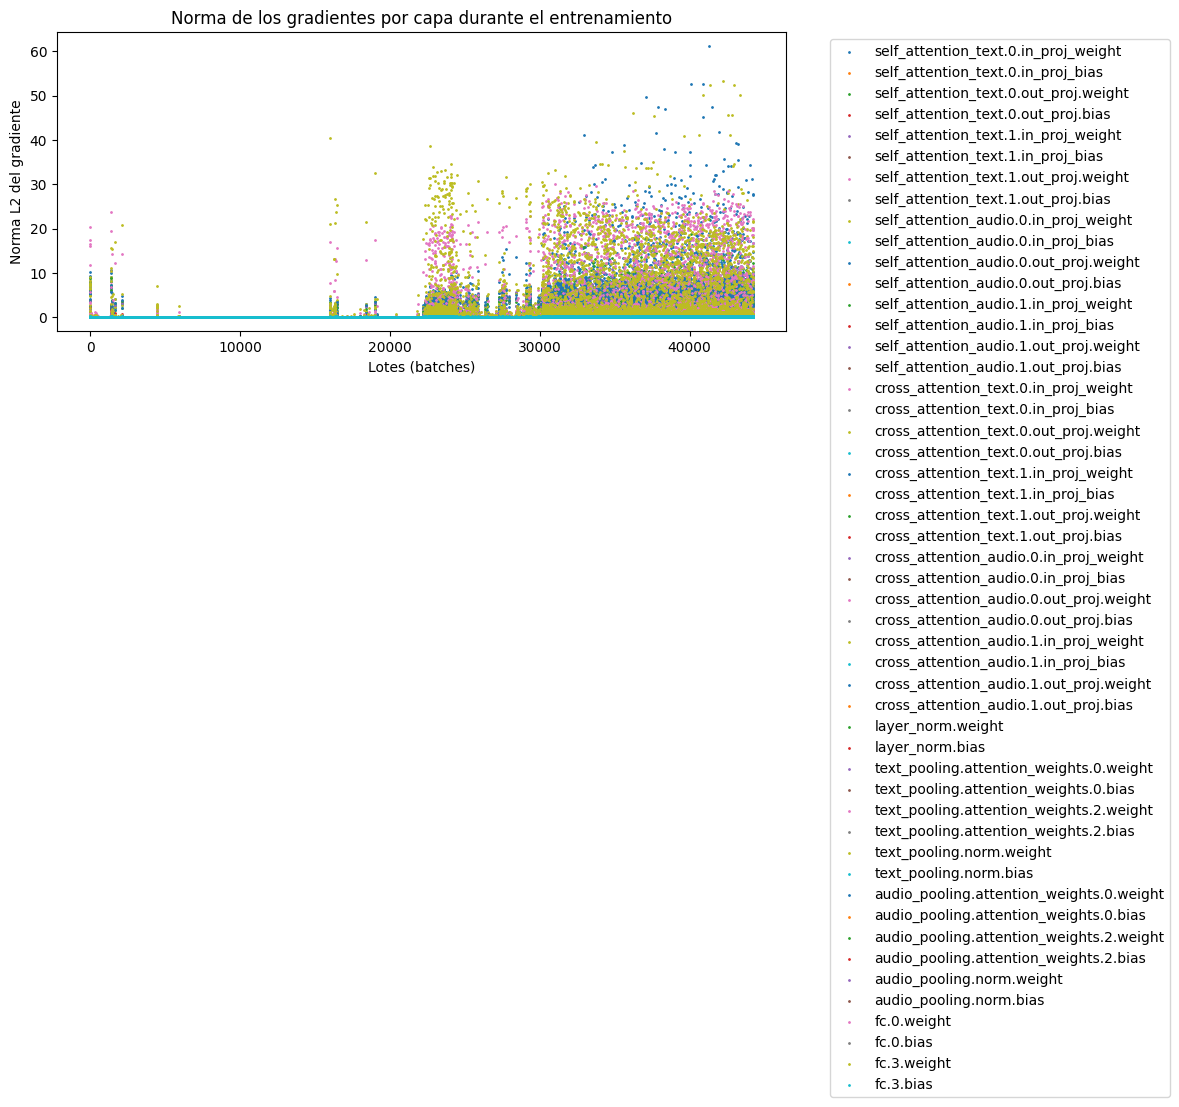

In [14]:

import matplotlib.pyplot as plt
epoch_size=885

plt.figure(figsize=(12, 8))
vanishing_gradients = {}
for name, norms in grad_history.items():
    colors = ['red' if norm == 0 else 'gray' for norm in norms]
    if "red" in colors:
        vanishing_gradients[name]=[]
        for idx, norm in enumerate(norms):
            if norm == 0:
                vanishing_gradients[name].append(idx)
    plt.scatter(range(len(norms)), norms, label=name, s=1)
    # for idx, norm in enumerate(norms):
    #     if norm == 0:
    #         plt.axvline(x=idx, color='red', linestyle='--', linewidth=0.5)
# for name, norms in grad_history.items():
#     colors = ['red' if norm == 0 else 'gray' for norm in norms]
#     plt.scatter(range(len(norms)), norms, c=colors, label=name, s=1)

plt.title('Norma de los gradientes por capa durante el entrenamiento')
plt.xlabel('Lotes (batches)')
plt.ylabel('Norma L2 del gradiente')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [15]:
vanishing_gradients.keys()

dict_keys(['self_attention_text.0.in_proj_weight', 'self_attention_text.0.in_proj_bias', 'self_attention_text.0.out_proj.weight', 'self_attention_text.0.out_proj.bias', 'self_attention_text.1.in_proj_weight', 'self_attention_text.1.in_proj_bias', 'self_attention_text.1.out_proj.weight', 'self_attention_text.1.out_proj.bias', 'self_attention_audio.0.in_proj_weight', 'self_attention_audio.0.in_proj_bias', 'self_attention_audio.0.out_proj.weight', 'self_attention_audio.0.out_proj.bias', 'self_attention_audio.1.in_proj_weight', 'self_attention_audio.1.in_proj_bias', 'self_attention_audio.1.out_proj.weight', 'self_attention_audio.1.out_proj.bias', 'cross_attention_text.0.in_proj_weight', 'cross_attention_text.0.in_proj_bias', 'cross_attention_text.0.out_proj.weight', 'cross_attention_text.0.out_proj.bias', 'cross_attention_text.1.in_proj_weight', 'cross_attention_text.1.in_proj_bias', 'cross_attention_text.1.out_proj.weight', 'cross_attention_text.1.out_proj.bias', 'cross_attention_audio.0.

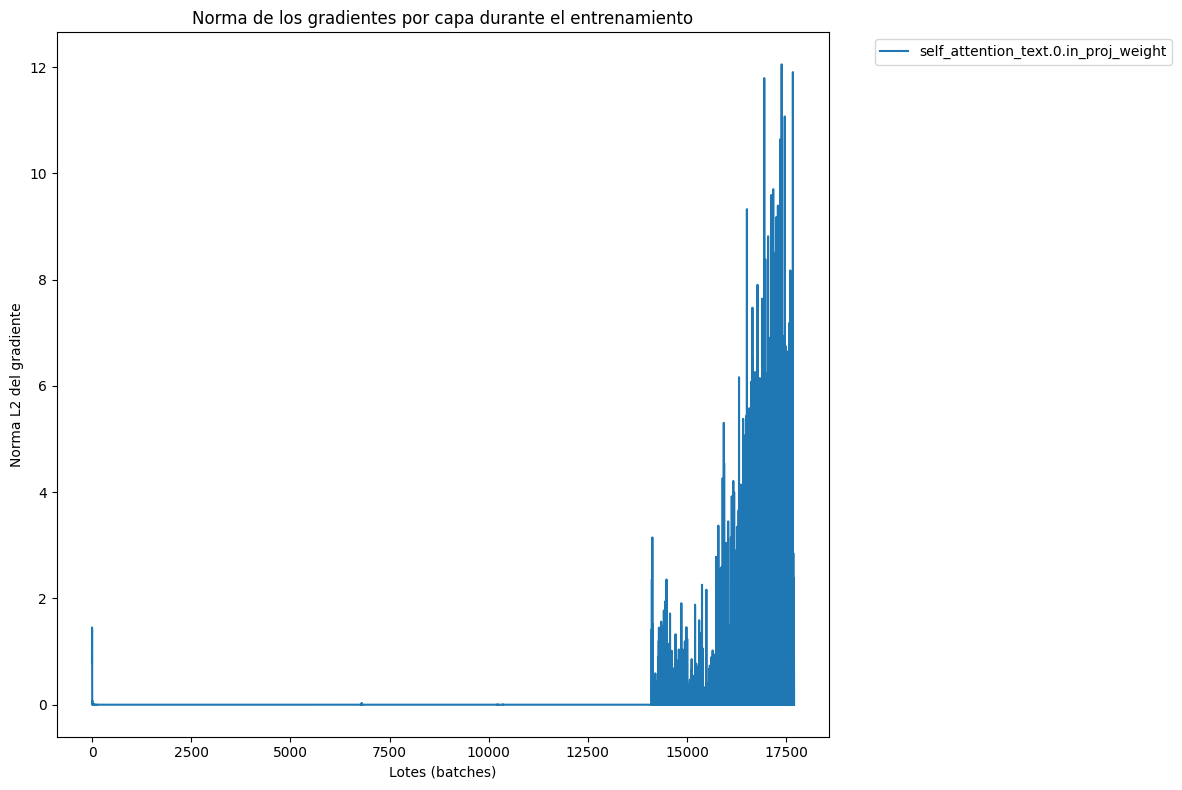

In [14]:
import matplotlib.pyplot as plt
# Sombreado y etiquetas para cada epoch

# Crear el gráfico
plt.figure(figsize=(12, 8))
for name, norms in grad_history.items():
    plt.plot(norms[885*0:885*20], label=name)
    break

plt.title('Norma de los gradientes por capa durante el entrenamiento')
plt.xlabel('Lotes (batches)')
plt.ylabel('Norma L2 del gradiente')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

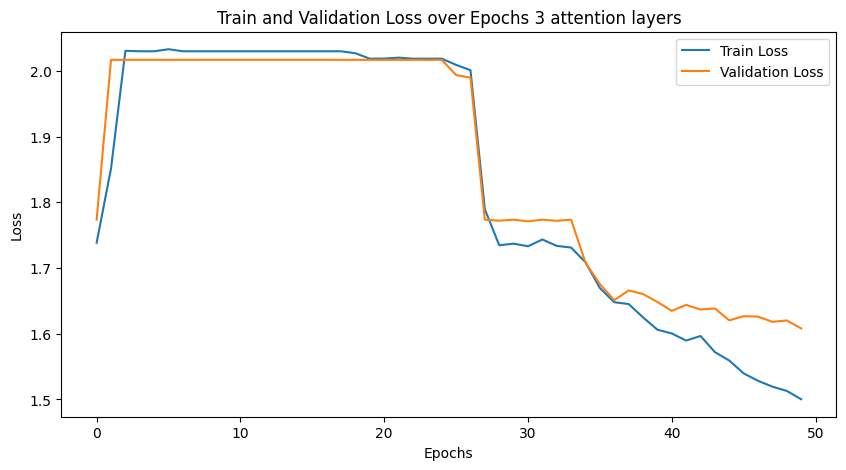

In [16]:
import matplotlib.pyplot as plt

# Plot train_loss and val_loss
plt.figure(figsize=(10, 5))
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss over Epochs 3 attention layers')
plt.legend()
plt.show()

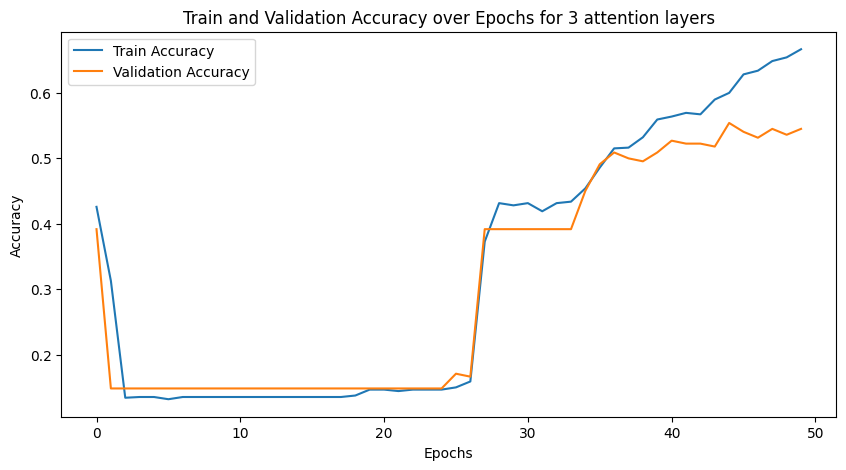

In [17]:
# Plot train_acc and val_acc
plt.figure(figsize=(10, 5))
plt.plot(history['train_acc'], label='Train Accuracy')
plt.plot(history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy over Epochs for 3 attention layers')
plt.legend()
plt.show()

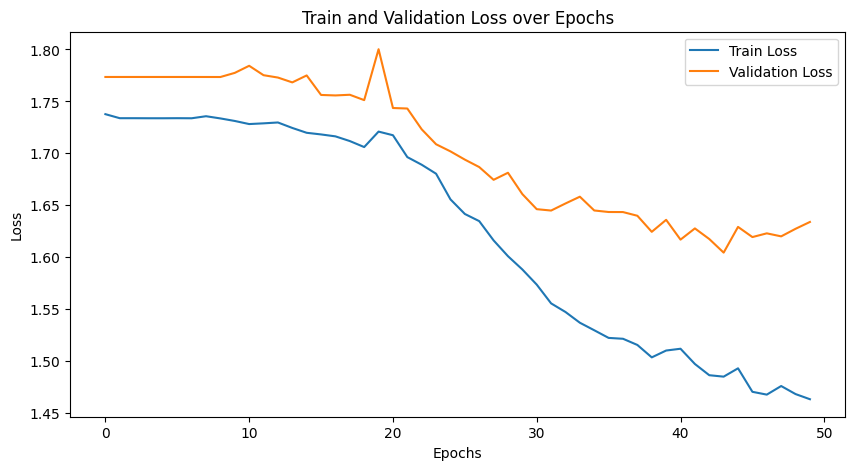

In [30]:
import matplotlib.pyplot as plt

# Plot train_loss and val_loss
plt.figure(figsize=(10, 5))
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss over Epochs')
plt.legend()
plt.show()

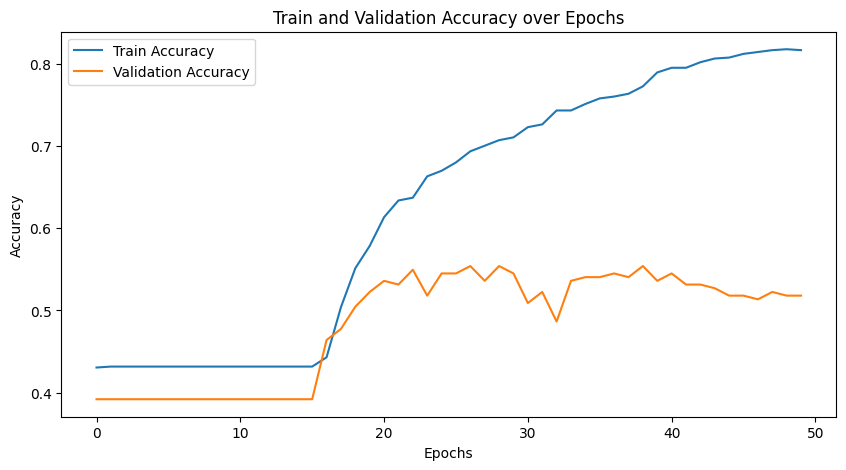

In [18]:
# Plot train_acc and val_acc
plt.figure(figsize=(10, 5))
plt.plot(history['train_acc'], label='Train Accuracy')
plt.plot(history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy over Epochs')
plt.legend()
plt.show()

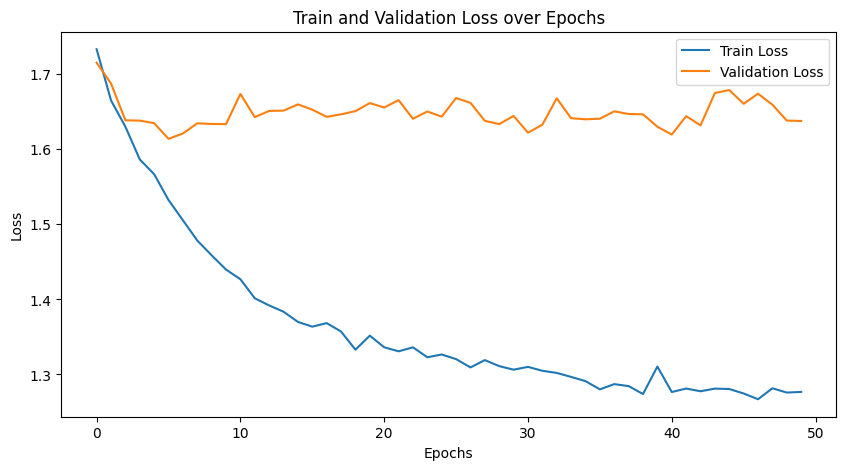

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss over Epochs')
plt.legend()
plt.show()

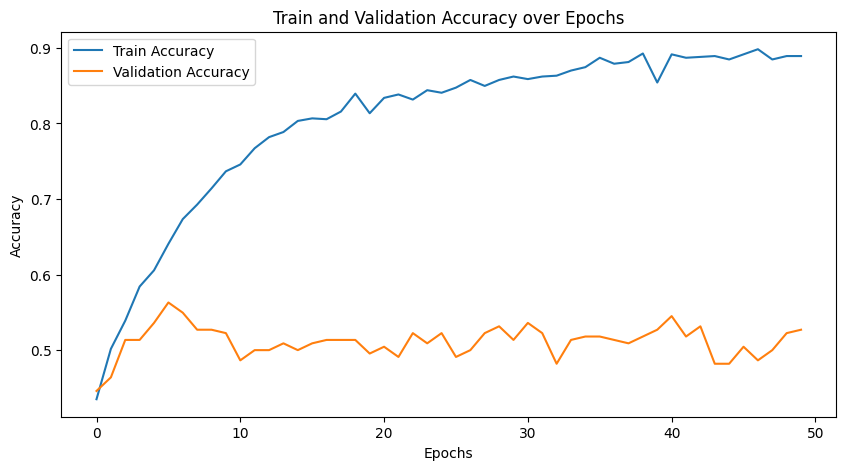

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(history['train_acc'], label='Train Accuracy')
plt.plot(history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy over Epochs')
plt.legend()
plt.show()

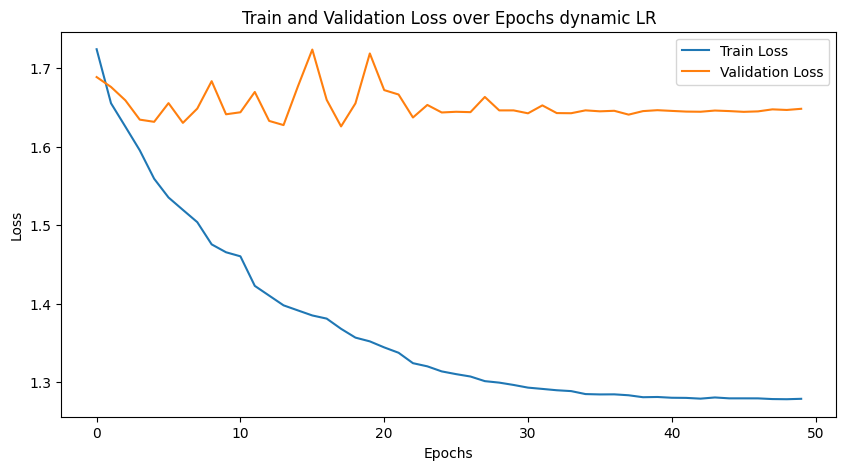

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss over Epochs dynamic LR')
plt.legend()
plt.show()

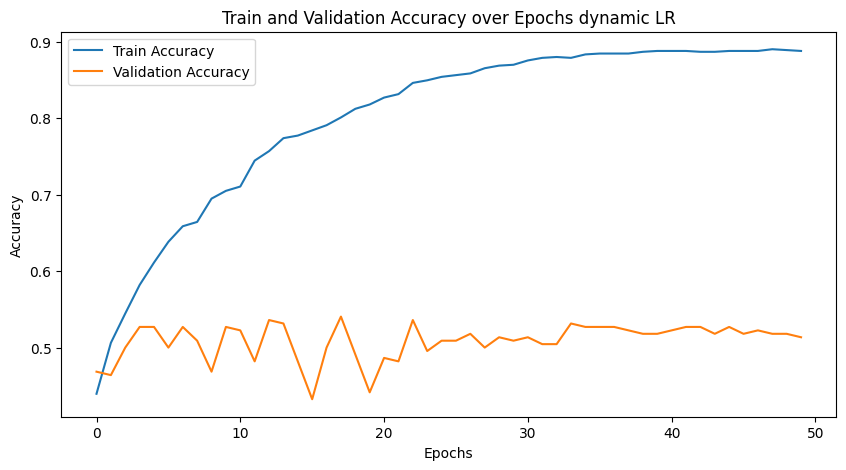

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(history['train_acc'], label='Train Accuracy')
plt.plot(history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy over Epochs dynamic LR')
plt.legend()
plt.show()